# Human Resources Attrition Analysis

In [1]:
import sys
import pandas as pd
import numpy as np 
import matplotlib.pyplot as  plt
import seaborn as sns

## loading dataset

In [2]:

read = pd.read_csv("C:\\Users\\chris\\OneDrive\\Desktop\\Raw Datasets\\HR-Employee-Attrition.csv")
df = pd.DataFrame(read)
df


,Age,Attrition,BusinessTravel,Daily Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
df.head(20)

,Age,Attrition,BusinessTravel,Daily Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
df.tail(21) # print the last 21 rows

,Age,Attrition,BusinessTravel,Daily Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
1449,32,No,Travel_Rarely,529,Research & Development,2,3,Technical Degree,1,2038,...,4,80,0,4,4,3,4,2,1,2
1450,35,No,Travel_Rarely,1146,Human Resources,26,4,Life Sciences,1,2040,...,3,80,0,9,2,3,9,0,1,7
1451,38,No,Travel_Rarely,345,Sales,10,2,Life Sciences,1,2041,...,3,80,1,10,1,3,10,7,1,9
1452,50,Yes,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,80,2,12,3,3,6,3,0,1
1453,36,No,Travel_Rarely,1120,Sales,11,4,Marketing,1,2045,...,1,80,1,8,2,2,6,3,0,0
1454,45,No,Travel_Rarely,374,Sales,20,3,Life Sciences,1,2046,...,3,80,0,8,3,3,5,3,0,1
1455,40,No,Travel_Rarely,1322,Research & Development,2,4,Life Sciences,1,2048,...,4,80,0,8,2,3,2,2,2,2
1456,35,No,Travel_Frequently,1199,Research & Development,18,4,Life Sciences,1,2049,...,4,80,2,10,2,4,10,2,0,2
1457,40,No,Travel_Rarely,1194,Research & Development,2,4,Medical,1,2051,...,2,80,3,20,2,3,5,3,0,2
1458,35,No,Travel_Rarely,287,Research & Development,1,4,Life Sciences,1,2052,...,4,80,1,4,5,3,4,3,1,1


In [5]:
df .info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         1470 non-null   int64  
 1   Attrition                   1470 non-null   object 
 2   BusinessTravel              1470 non-null   object 
 3   Daily Rate                  1470 non-null   int64  
 4   Department                  1470 non-null   object 
 5   DistanceFromHome            1470 non-null   int64  
 6   Education                   1470 non-null   int64  
 7   EducationField              1470 non-null   object 
 8   EmployeeCount               1470 non-null   int64  
 9   EmployeeNumber              1470 non-null   int64  
 10  EnvironmentSatisfaction     1470 non-null   int64  
 11  Gender                      1470 non-null   object 
 12  Hourly Rate                 1470 non-null   int64  
 13  Job Involvement             1470 

In [6]:
df.drop_duplicates(keep="last")    

,Age,Attrition,BusinessTravel,Daily Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [7]:
df.dropna()

,Age,Attrition,BusinessTravel,Daily Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager


In [8]:
df.shape

(1470, 36)

In [9]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Daily Rate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'Hourly Rate',
       'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
       'Marital Status', 'Monthly Income', 'Unnamed: 19', 'Monthly Rate',
       'Number Companies Worked', 'Over18', 'OverTime', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Option Level', 'Total Working Years', 'TrainingTimesLast Year',
       'Work Life Balance', 'Years At Company', 'Years In Current Role',
       'YearsSince Last Promotion', 'Years With Current Manager'],
      dtype='object')

In [10]:
df.isna().sum()

Age                              0
Attrition                        0
BusinessTravel                   0
Daily Rate                       0
Department                       0
DistanceFromHome                 0
Education                        0
EducationField                   0
EmployeeCount                    0
EmployeeNumber                   0
EnvironmentSatisfaction          0
Gender                           0
Hourly Rate                      0
Job Involvement                  0
Job Level                        0
Job Role                         0
Job Satisfaction                 0
Marital Status                   0
Monthly Income                   0
Unnamed: 19                   1470
Monthly Rate                     0
Number Companies Worked          0
Over18                           0
OverTime                         0
Percent Salary Hike              0
Performance Rating               0
Relationship Satisfaction        0
Standard Hours                   0
Stock Option Level  

In [11]:
df.isnull().values.any()

True

### Statistical Overview of HR Central Tendency

In [12]:
df.describe()

,Age,Daily Rate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Hourly Rate,Job Involvement,Job Level,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Number  of department Identified

In [13]:
for columns in df:
    dept_count= df["Department"].nunique() # check for the number of departments
    dept_name= df["Department"].unique().tolist() # the names of each distincts department 
print(f"The number of Department is {dept_count} and their names are {dept_name} departments")

The number of Department is 3 and their names are ['Sales', 'Research & Development', 'Human Resources'] departments


##### The Overall Employees in is 1,470

the below shows the scripts for the employee sum total

In [14]:
copied= df["EmployeeCount"].copy()
Total_employee= sum(copied)
print(f" The Overall Employees is {Total_employee:,}")

 The Overall Employees is 1,470


##### The total amount of Monthly Income is $9,559,309.00 

##### The Average Of Monthly Salary is $6,502.93

In [15]:
TotalMonthSal = 0  #initialising month to be 0
for incomes in df["Monthly Income"]:  #iterating incomes in thre column Monthly income
    TotalMonthSal += incomes # adding the next iterated income
print(f"The total amount of Monthly Income is ${TotalMonthSal:,.2f}")  # output : 9559309
avg_monthly_sal= TotalMonthSal /Total_employee
f"The Average Of Monthly Salary is ${avg_monthly_sal:,.2f}"

The total amount of Monthly Income is $9,559,309.00


'The Average Of Monthly Salary is $6,502.93'

In [16]:
# function to determine the distinct items and number of elements in a given column
def distinct_funct(column):
    
    distinct_items = column.unique().tolist() # Get the distinct items in the column
    num_elements = column.nunique() # Get the number of distinct elements in the column
    return distinct_items, num_elements

column_name = df["Education"]
distinct_element, num_elements = distinct_funct(column_name)

print(f"Distinct items: {distinct_element}")
print(f"Number of distinct elements: {num_elements}")


Distinct items: [2, 1, 4, 3, 5]
Number of distinct elements: 5


In [17]:
from collections import defaultdict
freq = defaultdict(int)
for element in df["BusinessTravel"]:
    freq[element] += 1
freq

defaultdict(int,
            {'Travel_Rarely': 1043,
             'Travel_Frequently': 277,
             'Non-Travel': 150})

In [18]:

df["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

### visualization of Business travel

<Axes: xlabel='count', ylabel='BusinessTravel'>

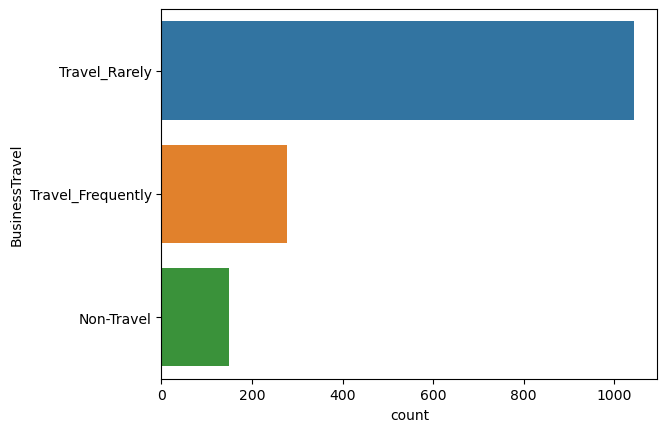

In [19]:
sns.countplot(y=df["BusinessTravel"])

### Visualization for Attrition

<Axes: xlabel='count', ylabel='Attrition'>

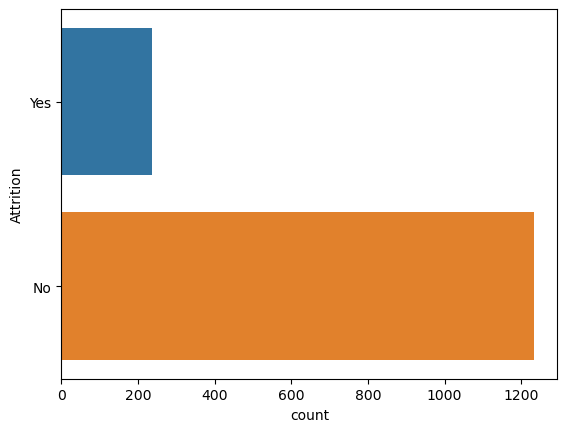

In [20]:
import seaborn as sns #import module
sns.countplot(y=df["Attrition"]) #

### for Gender

<Axes: xlabel='count', ylabel='Gender'>

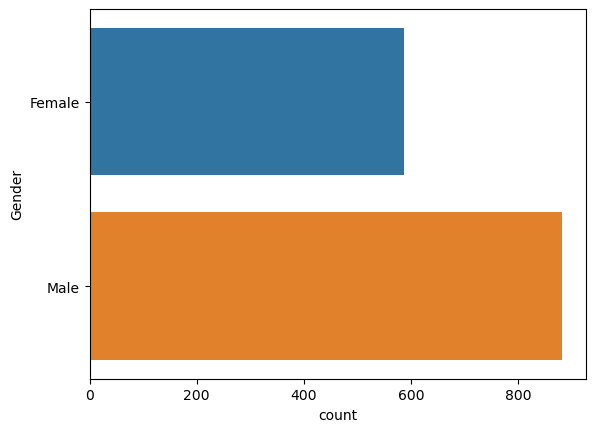

In [21]:
sns.countplot(y=df["Gender"])

In [22]:
# print the unique values and number of each elements
for column in df.columns:
    if df[column].dtype == object:
        print(f"{str(column)} :   {str(df[column].unique())}")
        print (df[column].value_counts())
        print("**************************************************************************************************")

Attrition :   ['Yes' 'No']
Attrition
No     1233
Yes     237
Name: count, dtype: int64
**************************************************************************************************
BusinessTravel :   ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
**************************************************************************************************
Department :   ['Sales' 'Research & Development' 'Human Resources']
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
**************************************************************************************************
EducationField :   ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other           

In [2]:
try:
    df.drop(df["Standard Hours"],inplace=True)

TypeError: catching classes that do not inherit from BaseException is not allowed

AttributeError: 'numpy.int64' object has no attribute 'startswith'

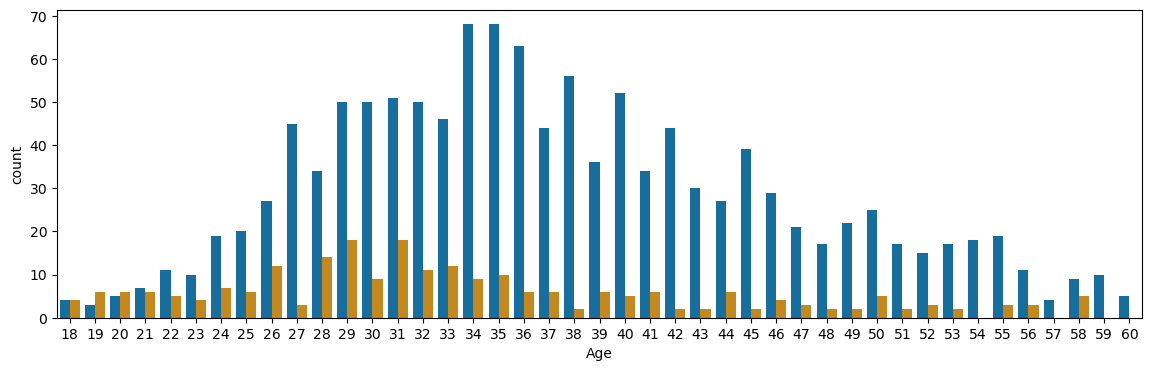

In [36]:
plt.subplots(figsize=(14,4))
sns.countplot(x= "Age", hue= "Attrition" ,data= df,palette="colorblind")



In [24]:
# Example of binary categorical conversion

df["Attrition"]= df['Attrition'].map({'Yes': 1, 'No': 0})

# Repeat the selection of numeric columns
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation
cor_matrix = numeric_df.corr()
cor_matrix


,Age,Attrition,Daily Rate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Hourly Rate,Job Involvement,...,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,TrainingTimesLast Year,Work Life Balance,Years At Company,Years In Current Role,YearsSince Last Promotion,Years With Current Manager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,NaN,-0.010577,-0.103369,-0.006846,-0.130016,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
Daily Rate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Hourly Rate,0.024287,-0.006846,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
Job Involvement,0.029820,-0.130016,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976


C:\Users\chris\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

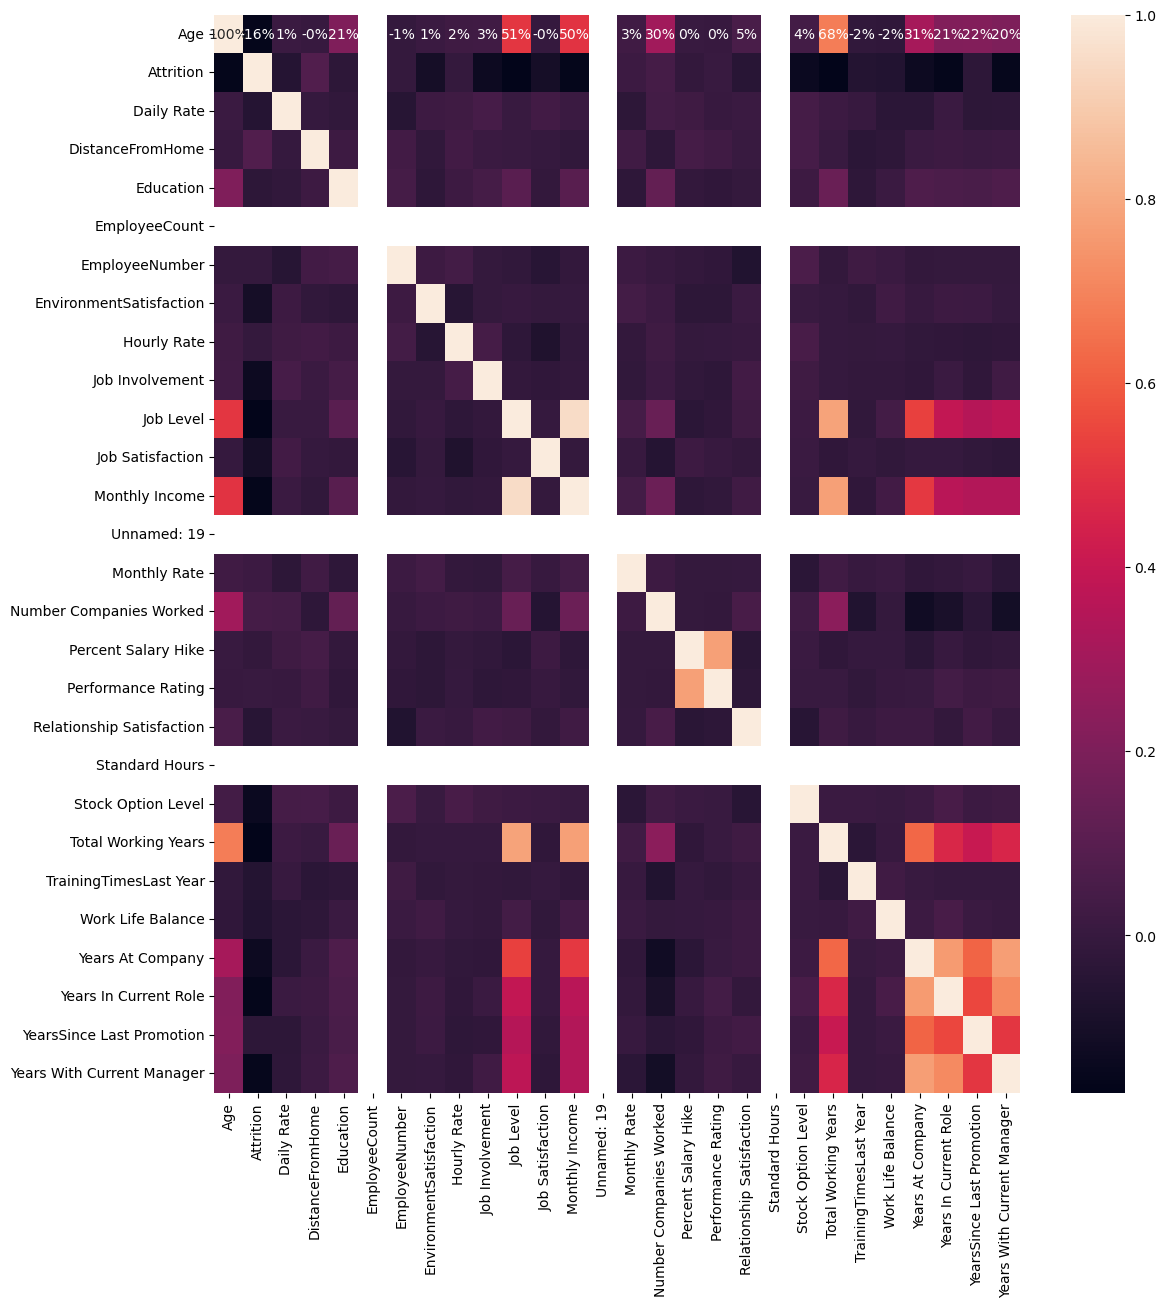

In [44]:
plt.figure(figsize=(13,14))
sns.heatmap(cor_matrix,annot = True ,fmt=".0%")